In [84]:
# 데이터 불러오기
import seaborn as sns
iris = sns.load_dataset("iris")

X = iris.drop("species", axis=1)
y = iris["species"]

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y) # pandas의 series 객체
# le.fit_transform(y.values) : series를 numpy 배열로 변환

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [87]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [88]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(
    criterion="gini", splitter="random", max_depth=5, random_state=10, max_leaf_nodes=10
)
result = dtc.fit(X_train_std, y_train)
y_train_pred = dtc.predict(X_train_std)
y_test_pred = dtc.predict(X_test_std)

## splitter: 
- 이 매개변수는 각 노드에서 데이터를 어떻게 분할할지 결정하는 전략을 정의
    - "best": 
        - 각 분할에서 가장 좋은 결과를 얻을 수 있는 기준을 찾는다. 
        - 이 방법은 노드를 분할할 때마다 전체 특성들을 고려하여 가장 정보량이 높은 분할을 선택한다. 
        - 계산 비용이 더 높다.
    - "random": 
        - 무작위로 분할을 선택하여 계산을 수행
        - 이는 계산 비용을 줄이지만 분할의 품질이 떨어질 수 있다.

## max_leaf_nodes: 
- 이 매개변수는 트리가 성장하는 방식을 제어
- 최대 리프 노드 수를 지정하여 트리의 크기와 복잡성을 제한
- 제한된 수의 리프 노드를 가짐으로써 트리의 성장을 조절할 수 있으며, 이는 과적합을 방지하는 데 도움
- 리프 노드 수가 너무 적으면 트리가 너무 단순해져서 성능이 저하될 수 있음.

In [89]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9333333333333333


[Text(0.5, 0.9166666666666666, 'petal length <= -1.081\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.375, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(0.625, 0.75, 'petal length <= 0.911\ngini = 0.527\nsamples = 72\nvalue = [2, 35, 35]\nclass = versicolor'),
 Text(0.5, 0.5833333333333334, 'petal length <= 0.212\ngini = 0.441\nsamples = 50\nvalue = [2, 35, 13]\nclass = versicolor'),
 Text(0.25, 0.4166666666666667, 'petal length <= -0.886\ngini = 0.219\nsamples = 16\nvalue = [2, 14, 0]\nclass = versicolor'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = setosa'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]\nclass = versicolor'),
 Text(0.75, 0.4166666666666667, 'petal width <= 0.884\ngini = 0.472\nsamples = 34\nvalue = [0, 21, 13]\nclass = versicolor'),
 Text(0.625, 0.25, 'petal length <= 0.483\ngini = 0.311\nsamples = 26\nvalue = [0, 21, 5]\nclass = versicolor'),
 Text(0.5, 0.08

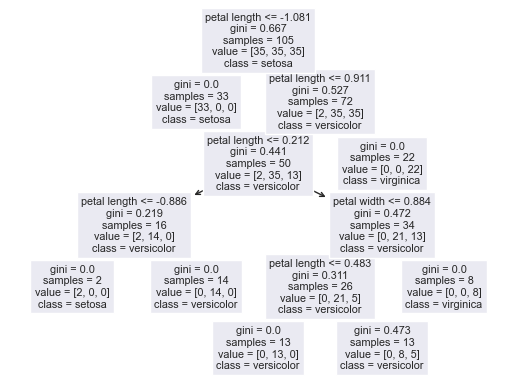

In [90]:
tree.plot_tree(result,class_names=['setosa', 'versicolor', 'virginica'],
               feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [91]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    dtc, filled=True, rounded=True, class_names=['setosa', 'versicolor', 'virginica'], feature_names=['sepal length', 'sepal width', 'petal length', 'petal width']
)
graph = pydotplus.graph_from_dot_data(dot_data)

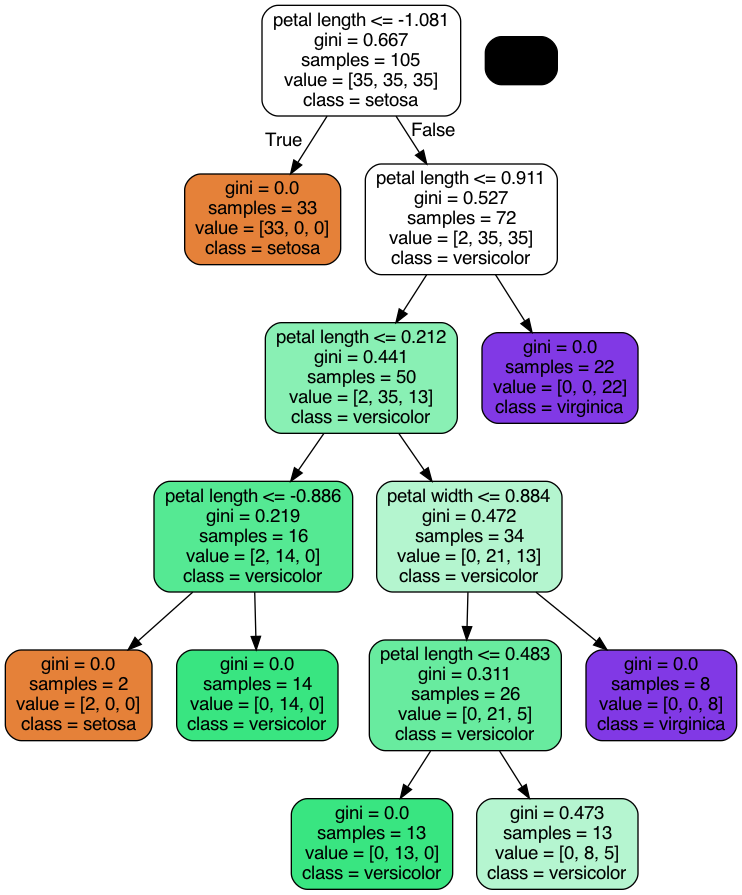

In [92]:
from IPython.display import Image
Image(graph.create_png())